In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
interval = ["point125","point25","point5","point75"]
itv = interval[3]
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/single/gridsearch/"+itv+"/"
plot_save_dir = './plots_for_thesis/single/gridsearch/'
modes = ["PLA"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

PLA: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/gridsearch/point75\run_PLA_1569641711gra1068_file.csv


In [30]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))
        
    
    metrics = ["rollout/return"]
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

4676


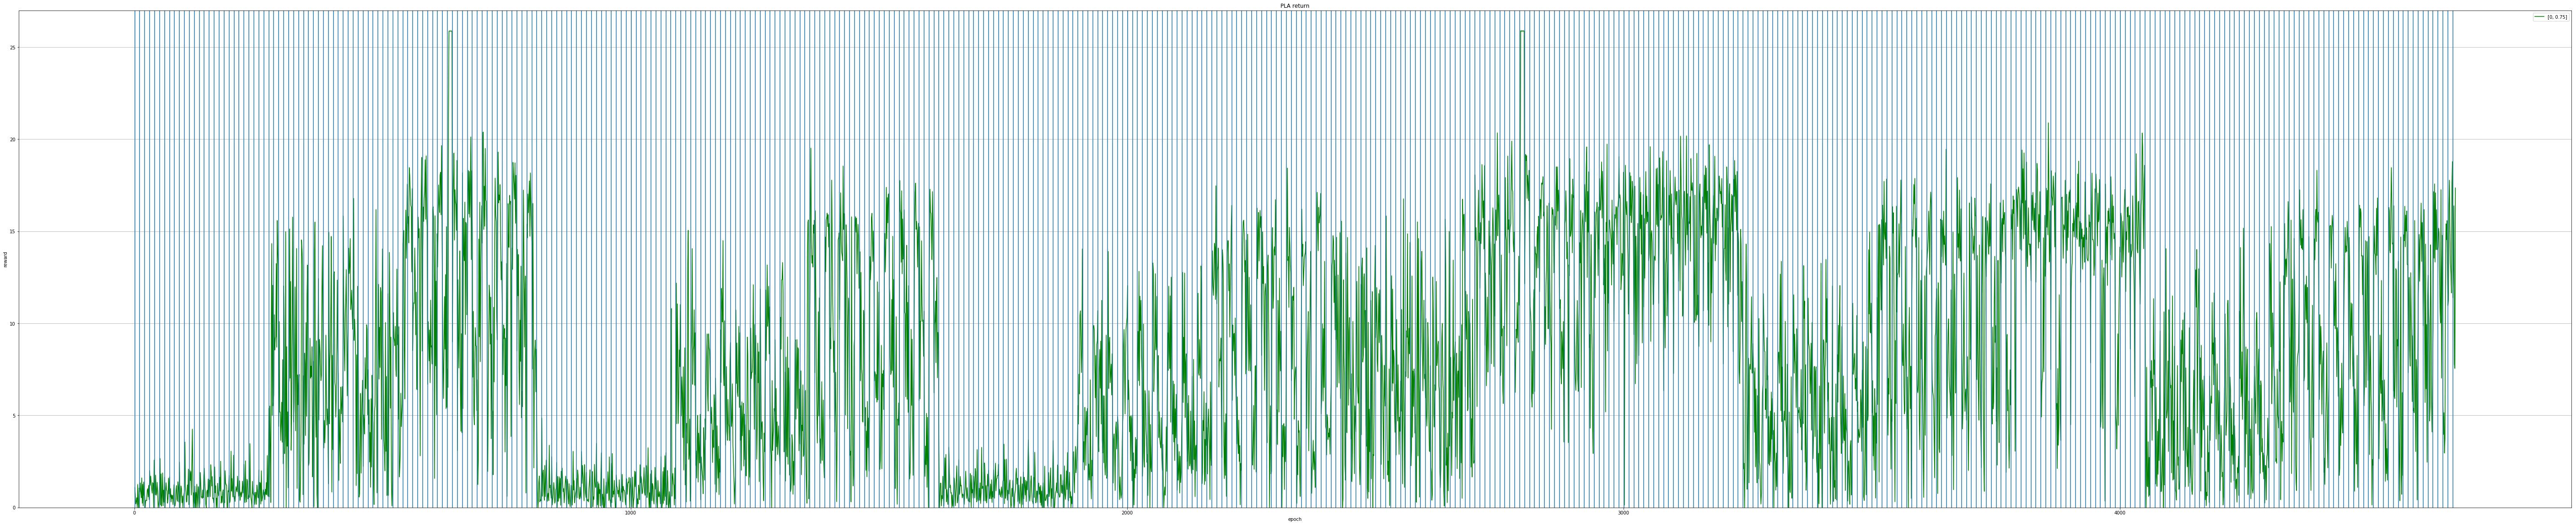

In [39]:
# Plot return
colors = ['g']
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["PLA"]
for mode, c in zip(modes, colors):
    plt.figure(figsize=(100,20))
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    print(length)
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,length,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,length,length), data[metric+'_avg'], '-', color=c,
         label=label)
    for xi in np.linspace(1,length,length)[::10]:
        plt.axvline(x=xi, ymin=-1, ymax=1)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')


In [24]:
import os, sys
print(os.getcwd())
Agent_1_interaction_data_files = glob.glob('../SHARCNET/Results/single/gridsearch/'+itv+'/**/*.csv', recursive=True)
Agent_1_interaction_data_files.sort()
Agent_1_interaction_data_files

F:\unity_simulator\unity_simulator\notebook


['../SHARCNET/Results/single/gridsearch/point125\\PLA\\2019-09-27-233450-10086-10\\log\\2019-09-27.csv',
 '../SHARCNET/Results/single/gridsearch/point125\\PLA\\2019-09-27-233450-10086-10\\log\\2019-09-28.csv']

In [25]:
Agent_1_interaction_data = {}
for file in Agent_1_interaction_data_files:
    Agent_1_interaction_data[file] = pd.read_csv(file, header=None)
    Agent_1_interaction_data[file].columns = ['Time','Observation','Action','Reward']
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    Agent_1_interaction_data[file]['Observation'] = Agent_1_interaction_data[file]['Observation'].apply(convert_str_to_matrix)
    Agent_1_interaction_data[file]['Action'] = Agent_1_interaction_data[file]['Action'].apply(convert_str_to_matrix)
    print(Agent_1_interaction_data[file].shape)

(2001, 4)
(114497, 4)


In [26]:
Agent_1_interaction_data_all = {}
Agent_1_interaction_data_all['data'] = pd.DataFrame()
Agent_1_interaction_data_all['separate_line'] = []
Agent_1_interaction_data_all['date'] = []
for key in Agent_1_interaction_data.keys():
    Agent_1_interaction_data_all['data'] = pd.concat([Agent_1_interaction_data_all['data'], Agent_1_interaction_data[key]])
    Agent_1_interaction_data_all['separate_line'].append(len(Agent_1_interaction_data[key]))
    Agent_1_interaction_data_all['date'].append(key.split('/')[2].split('-')[0])

In [27]:
# Convert action into np.array
Agent_1_action = np.array(Agent_1_interaction_data_all['data']['Action'].tolist())
# read action_space_name
action_space_name = pd.read_csv('action_space_name_pla.csv')

Agent_1_action_df = pd.DataFrame(Agent_1_action, columns = action_space_name['actuator_name'])
Agent_1_action_df.shape

(116498, 11)

In [28]:
Agent_1_action_df

actuator_name,led_ru,led_ho,led_rd,moth_ru,moth_ho,moth_rd,I_max,ml_gap,sma_gap,n_gap,t_sma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0
2,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0
3,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0
4,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0
5,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0
6,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0
7,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0
8,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0
9,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0
